In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.shape

(10000, 3)

In [4]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [5]:
import seaborn as sns

/var/folders/kt/_wys5q9j4f5cxnwphmf7mxjh0000gn/T/ipykernel_86165/3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

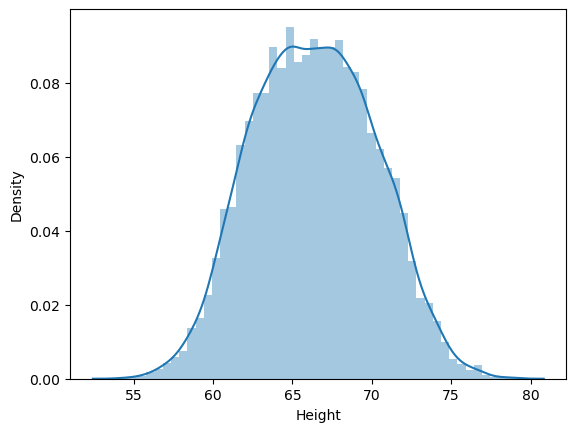

In [6]:
sns.distplot(df['Height'])

<Axes: >

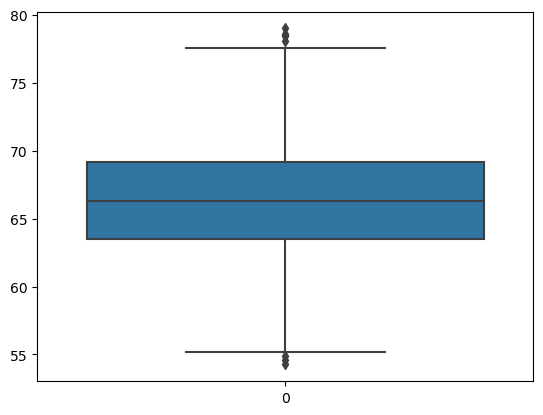

In [7]:
sns.boxplot(df['Height'])

In [8]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [9]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

# Trimming


In [10]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [11]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

<Axes: >

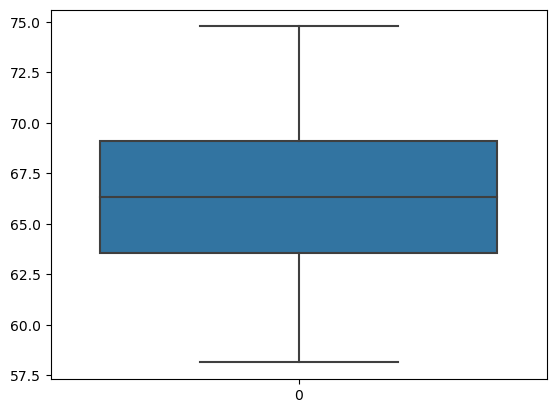

In [13]:
sns.boxplot(new_df['Height'])

# Capping --> Winsorization


In [12]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

<Axes: >

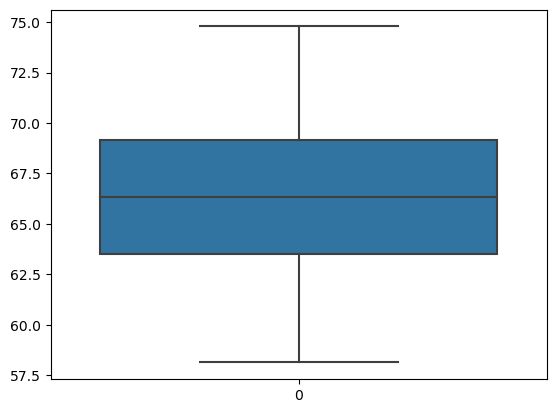

In [14]:
sns.boxplot(df['Height'])